Starting this project, I will first do some exlporatory data analysis, and then clustering, and then finally some prediction based system that will tell the results of the data for if the water is drinkable or not

My guide for the exploration of the data is: https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce

My data for this water projectis from: https://www.kaggle.com/adityakadiwal/water-potability


Future ideas for next data sets are: https://www.kaggle.com/varpit94/ethereum-data


# Notes and Thoughts Area

#1 It cold be interesting to look into if we did not have pH or a certain data point, the confidence we could tell that if the water is good to drink or bad (we also have a lot of nan data points)

# Importing Relavant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
%matplotlib inline 
sns.set(color_codes=True)

# Loading and Assessing the Data

In [2]:
import_df = pd.read_csv('water_potability.csv')

### Checking out the top 10 rows

In [3]:
import_df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


### Info on the data frame

In [4]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Data Types

In [5]:
import_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# Cleaning

### Duplicates
We are checking to see if there are any duplicate rows, since it would be redundant to include in our dataset, futhermore, we will then remove any duplicates from our dataset

As you can see below, there are no duplicate rows included

In [6]:
duplicate_rows_df = import_df[import_df.duplicated()]
duplicate_rows_df.shape

(0, 10)

### Null or Missing data points
In this step we will be cleaning the data from any null datapoints, while we have a few data points in our data set, we must clear any null items when focusing on future steps of the data

In [7]:
print(import_df.isnull().sum())
found_df = import_df.dropna()
print("Non Null rows: " + str(found_df.shape))

null_df = import_df[import_df.isnull().any(1)]
print("Null rows: " + str(null_df.shape))

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Non Null rows: (2011, 10)
Null rows: (1265, 10)


#### Outliers
Finding outliers in the data

<AxesSubplot:xlabel='Potability'>

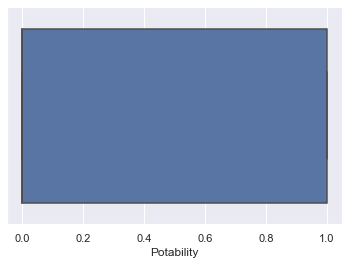

In [8]:
sns.boxplot(x=found_df['Potability'])

# Basic Plotting of the Data

### Relationship of each item to each other - Heatmap

We do this to see if there are any variables that relate to each other in terms of being dependent or finding correlations between two varaibles

According to the results, there saeem to be a lack of realtionships between all the varaibles, indicating that none of the variables are impacted by another. This low relationship provides insight into how each variable is not impacted by another variable or in otherwords is independent. The closest to a relationship with (11% correlation score) is between pH and hardness

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


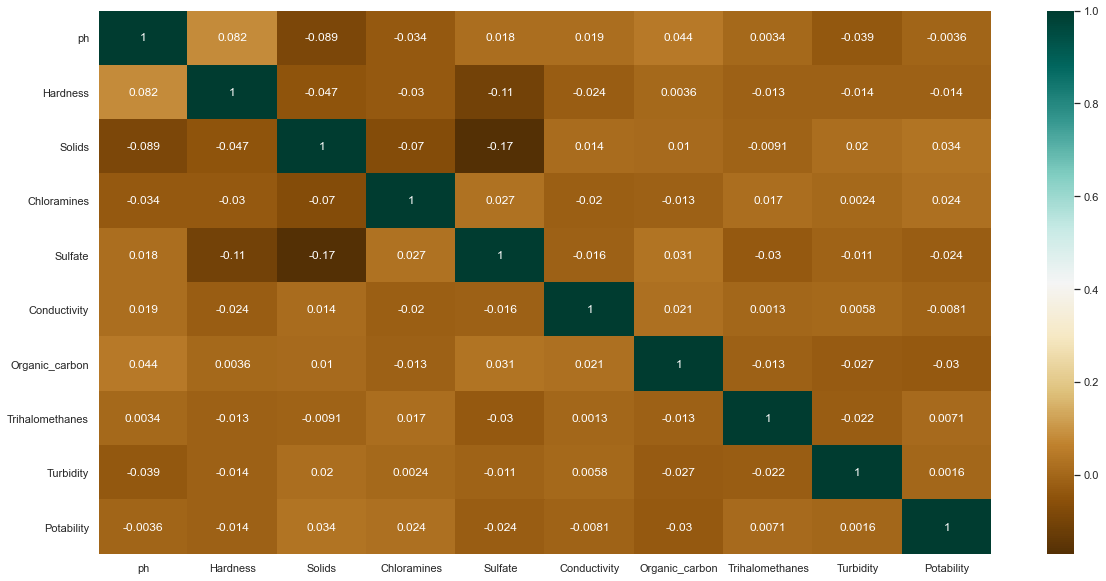

In [9]:
plt.figure(figsize=(20,10))
c= import_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


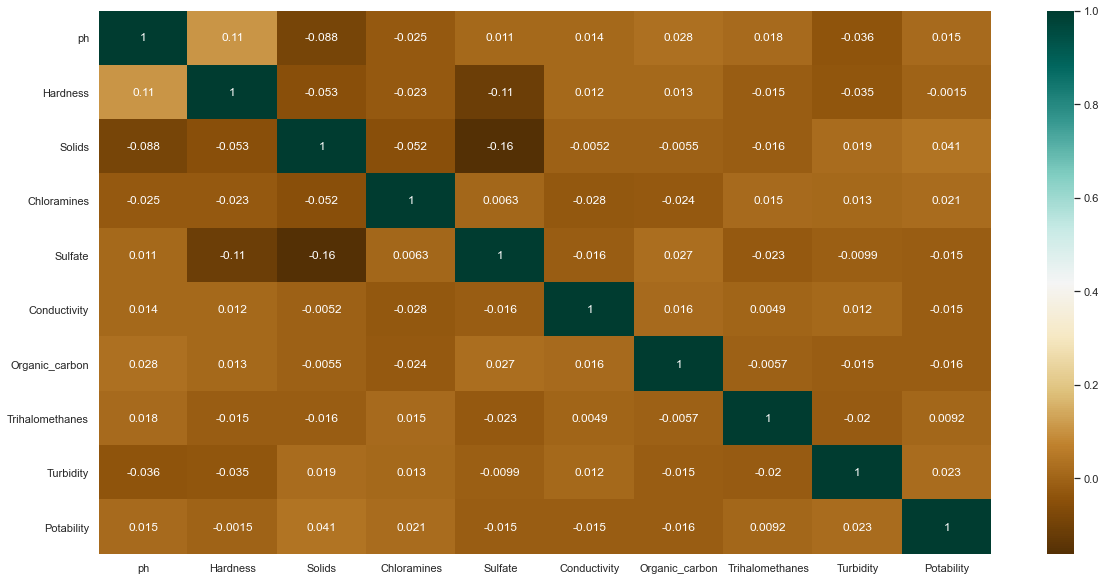

In [10]:
plt.figure(figsize=(20,10))
c= found_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

 A Scatter plot is generally used to test correlations between two variables
 
With this data set, since there is low correlation between the variables, I will take the largest correlation value and plot to see if there are any approachable relationship

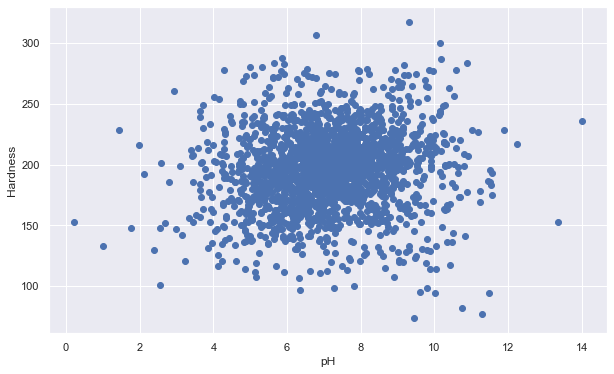

In [11]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(found_df["ph"], found_df['Hardness'])
ax.set_xlabel('pH')
ax.set_ylabel('Hardness')
plt.show()

# Predicting Potability

Machine Learning and Where to Begin:
https://towardsdatascience.com/machine-learning-where-to-begin-772667260529

ML Algorithms:
https://samrose3.github.io/algorithm-explorer/

Starters:
https://srnghn.medium.com/machine-learning-trying-to-predict-a-categorical-outcome-6ba542b854f5

Binary Classification List:
https://medium.com/@alex.ortner.1982/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

Balancing data for Classification:
https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0#ceab

Evaluating the Machine Learning Model:
https://towardsdatascience.com/machine-learning-chi-square-test-in-evaluating-predictions-486404dd5bc

# Path To Machine Learning

Given that our problem is to be able to classify data and understand whether or not the water is potable (in other words, we can drink the water), we are looking into Classification Techiques. And these classification techniques are used to predict what the category is of the input information. In this specific use case, we are looking at a binary indicator of if the water is potable or not. This type of Machine Learning project is supervised learning as we are providing labeled data to uncover the accuracy of the model within the train and test model. 

Some of the popular ML models for classification are:
- Support Vector Machines
- Naive Bayes
- Logistic Regression
- Decision Trees
- Neural Networks


Now to explore these options in a binary classification setting:


In [14]:
X = found_df.copy().drop('Potability', axis=1)
y = found_df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X,y)

NameError: name 'train_test_split' is not defined

# Testing Site